# Temporal overlap figure

In [51]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns

## Fake data

In [17]:
#fake uavsar dates
columns = ['start_date', 'end_date', 'collection']
index = range(8)

uavsar_df = pd.DataFrame(columns=columns, index=index)

uavsar_df['start_date'] = ['20200910', '20201010', '20201110', '20201210', '20210110', '20211020', '20210910', '20211010']
uavsar_df['end_date'] = ['20201010', '20201110', '20201210', '20210110', '20211020', '20210910', '20211010', '20211110']
uavsar_df['collection'] = ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
uavsar_df['date_order'] = range(8)

uavsar_df['start_date'] = pd.to_datetime(uavsar_df['start_date'], format='%Y%m%d')
uavsar_df['end_date'] = pd.to_datetime(uavsar_df['end_date'], format='%Y%m%d')

uavsar_df

,start_date,end_date,collection,date_order
0,2020-09-10,2020-10-10,a,0
1,2020-10-10,2020-11-10,a,1
2,2020-11-10,2020-12-10,b,2
3,2020-12-10,2021-01-10,c,3
4,2021-01-10,2021-10-20,c,4
5,2021-10-20,2021-09-10,d,5
6,2021-09-10,2021-10-10,e,6
7,2021-10-10,2021-11-10,f,7


In [59]:
# fake icesat 2 passes 
columns = ['date']
index = range(8)

icesat_df = pd.DataFrame(columns=columns, index=index)

icesat_df['date'] = ['20200923', '20201016', '20201102', '20201216', '20210130', '20211020', '20210908', '20211019']
icesat_df['collection'] = ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
icesat_df['date'] = pd.to_datetime(icesat_df['date'], format='%Y%m%d')


icesat_df

,date,collection
0,2020-09-23,a
1,2020-10-16,a
2,2020-11-02,a
3,2020-12-16,a
4,2021-01-30,a
5,2021-10-20,a
6,2021-09-08,a
7,2021-10-19,a


Text(0.5, 0, 'date')

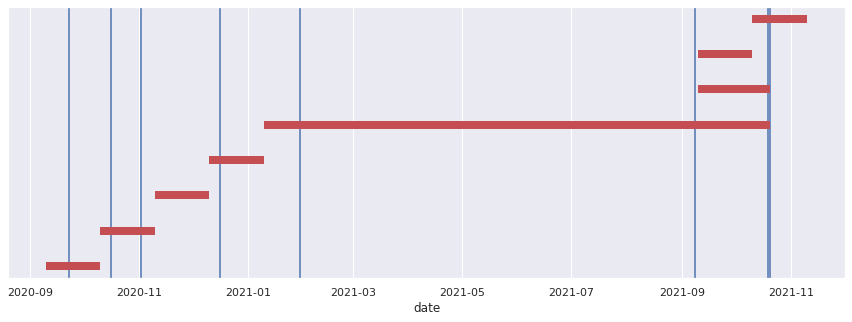

In [66]:
sns.set_theme()

# plot temporal overlap
f, ax = plt.subplots(figsize=(15,5))

for i in range(len(icesat_df)):
    ax.axvline(icesat_df['date'][i], 0, 1)

for i in range(len(uavsar_df)):
    ax.plot([uavsar_df['start_date'][i], uavsar_df['end_date'][i]], [i, i], 'r', lw=8, solid_capstyle='butt')
ax.set_yticks([])
ax.set_xlabel('date')



## Grand Mesa